In [1]:
# to read .pkl files
import pickle


# for Scientific and vector computation
import numpy as np

#to plot (visualize) the data
from matplotlib import pyplot as plt

#to minimize cost function and calculate theta
from scipy import optimize

# to use random.shuffle()
import random

# to write labels into a csv file
import csv

# to create and manipulate dataframe
import pandas as pd


<p> Reading the file train_image.pkl and train_label.pkl. <br/>
    And storing the result in a dataframe 'data' </p>

In [2]:
with open('train_image.pkl','rb') as f:
    data = pd.DataFrame(pickle.load(f))
with open('train_label.pkl','rb') as fp:
    df = pd.DataFrame(pickle.load(fp))
data = pd.concat([data,df],axis=1)
num = [p for p in range(8000)]
random.shuffle(num)
#print(num)
data_array = np.zeros((8000,785))
X = data.iloc[num,:].values
#display(data)

display(data)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,11,142,200,...,110,158,18,0,3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,80,46,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,58,121,...,23,30,37,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,42,...,32,19,23,13,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,39,90,...,149,186,0,0,2,0,0,0,0,0
8,0,0,0,0,0,0,0,73,143,149,...,57,119,97,7,0,0,0,0,0,0
9,0,0,0,0,0,0,0,96,155,0,...,197,234,101,0,0,0,0,0,0,0


<p> Since there are 784 columns, so the image will be <strong>28 X 28</strong> grid.<br/> The cell given below tries to visualize the data to gain more understanding of it </p>

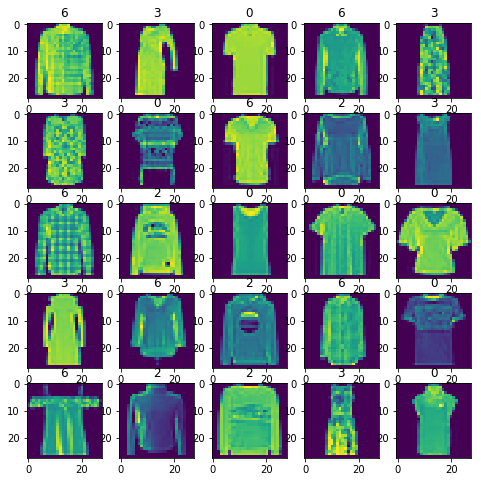

In [3]:
m = 28

# x stores the pixel density of one complete 28 X 28 grid
x = np.zeros((m,m))

# creating 25 subplots from the info in dataset given  
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
for a,k in zip(ax.flat,range(25)):
    for i in range(0,756,28):
        j = int(i/28)
        x[j,:] = X[k,i:i+28]
    a.imshow(x)
    a.set_title(X[k,784])

In [4]:
labels = np.unique(X[:,784])
print(labels)
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)

[0 2 3 6]


<p>Creating :
    <ol>
        <li>Training set : X_train,Y_train (60 % of data provided i.e contains 4800 rows)</li>
        <li>Test set : X_test, Y_test (20 % i.e. 1600 rows)</li>
        <li>Validation set : X_val, Y_val (20% i.e. 1600 rows)</li>
    </ol>
    Here X and Y contains the data for images and their label respectively. We're creating different sets so as to select good regularization parameter and check the accuracy/precision of our algorithm.
</p>

In [5]:
#X_train = np.zeros((4800,785))
Y_train = np.zeros(4800)
X_train = X[:4800,:-1]
Y_train = X[:4800,785]
X_val = X[4800:6400,:-1]
Y_val = X[4800:6400,785]
X_test = X[6400:,:-1]
Y_test = X[6400:,785]

<h4>Normalizing data</h4>
<br/>by subtracting mean and dividing by standard deviation <br/>
edit : this didn't work since the maximum values was still around 68 which was causing sigmoid function to produce 0 output and python was throwing Runtime warning : divide by zero log 

In [6]:
def normalization(x_):
    mean = np.mean(x_[:,1:],axis=0)
    standard_deviation = np.std(x_[:,1:],axis=0)
    print(mean)
    m = x_.shape[1]
    for i in range(m-1):
        x_[:,i+1] = (x_[:,i+1] - mean[i])/standard_deviation[i]
    return x_

<h4> Feature Scaling </h4>
Feature scaling so that all values are between 0 and 1

In [7]:
def feature_scaling(x_):
    for i in range(x_.shape[1]-1):
        # to avoid divide by zero i.e. when range =0 or max = min
        if(np.ptp(x_[:,i+1])!=0):
            x_[:,i+1] = (x_[:,i+1]-np.amin(x_[:,i+1]))/np.ptp(x_[:,i+1])
        # for case where all values are equal (i.e. range = 0) but no 0
        elif (np.amax(x_[:,i+1])!=0):
            x_[:,i+1] = (x_[:,i+1])/np.amax(x_[:,i+1])
    return x_

feature scaling training set, test set and validation set

In [8]:
X_train_norm = feature_scaling(X_train)
X_test_norm = feature_scaling(X_test)
X_val_norm = feature_scaling(X_val)
#print(feature_scaling(np.array([[1,2,3],[4,5,6]])))

<h4>Sigmoid Function </h4>
The function in cell below calculates sigmoid function

In [9]:
def sigmoid(z):
    sig = np.exp(-z)
    sig = 1  + sig
    sig = 1/sig
    return sig

<h4>Logistic Regression Cost Function </h4>
The function in cell below calculates the Cost for Logistic regression using one-vs-all method. <br/>
In the function y_ is a matrix of boolean values where false and boolean true indicates the abscence and presence of that value corresponding to a particular label respectively.

In [10]:
def lrCostFunction(theta,x_,y_,lambda_):
    if y_.dtype == bool:
        y_ = y_.astype(int)
    m = y_.size
    J = -(1/m) * np.sum(y_*np.log(sigmoid(np.dot(x_,theta))) + (1-y_)*np.log(1-sigmoid(np.dot(x_,theta))))
    J = J + lambda_/(2*m) * np.sum(theta[1:]**2)
    grad = np.dot(x_.T,sigmoid(np.dot(x_,theta))-y_)
    grad[1:] = grad[1:] + (lambda_/m)*theta[1:]
    return J,grad

<h4> Calculate Theta </h4>
The function given in cell below calculates value of theta, it iterates over each elements in labels i.e. 0,2,3,6 and gives theta corresponding to each label by minimizing the cost function (it makes use of lrCostFunction given above).

In [11]:
def calcTheta(x_,y_,initial_theta,lambda_,labels):
    options = {'maxiter':150}
    all_theta = np.zeros((len(labels),x_.shape[1]))
    for (c,j) in zip(labels,range(len(labels))) :
        res = optimize.minimize(lrCostFunction,initial_theta,(x_,(y_==c),lambda_),jac=True,method='TNC',options=options)
        all_theta[j:] = res.x
    return all_theta

The cell below calls the function calcTheta() to calculate theta. 

In [23]:
n = X_train.shape[1]
m = len(labels)

initial_theta = np.zeros((n,1))
#initial_theta.fill(0.00001)

lambda_ = 0.0
print(np.amax(np.dot(X_train_norm,initial_theta)))
print(np.amin(np.dot(X_train_norm,initial_theta)))
all_theta_calc = calcTheta(X_train_norm,Y_train,initial_theta,lambda_,labels)
print(all_theta_calc)

0.0
0.0


FloatingPointError: divide by zero encountered in log

<h4> Predict label </h4>
The function given below predicts the label given test set and Theta

In [ ]:
def predict(x_,all_theta,labels):
    idx = np.argmax(np.dot(x_,all_theta.T),axis=1)
    return labels[idx]

The cell below calls the function predict

In [ ]:
y_test_calc = predict(X_test_norm,all_theta_calc,labels)
y_val_calc = predict(X_val_norm,all_theta_calc,labels)
y_train_calc = predict(X_train_norm,all_theta_calc,labels)

<h4>Build Confusion Matrix </h4>

The cell given Below creates the confusion matrix of size K X K where K is the size of label 

In [ ]:
def build_confusion_matrix(Y_test_calc,Y_test,labels):
    k= len(labels)
    confusion_matrix = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            confusion_matrix[i][j] = np.sum((Y_test == labels[i]) & (Y_test_calc == labels[j]))
    conf_mat_df = pd.DataFrame(confusion_matrix)
    display(conf_mat_df)
    return confusion_matrix

In [ ]:
print(Y_test.shape)
confusion_matrix = build_confusion_matrix(y_test_calc,Y_test,labels)
confusion_matrix_val = build_confusion_matrix(y_val_calc,Y_val,labels)
confusion_matrix_train = build_confusion_matrix(y_train_calc,Y_train,labels)

<h4> Calculate recall and Precision </h4>
The function given in the cell below calculates recall and precision provided the confusion matrix 

In [ ]:
def calculate_recall_precision(confusion_matrix):
    precision_array = np.diag(confusion_matrix) / np.sum(confusion_matrix,axis=0)
    recall_array = np.diag(confusion_matrix)/np.sum(confusion_matrix,axis=1)
    precision = np.mean(precision_array)
    recall = np.mean(recall_array)
    print("precision is : %s"% precision)
    print("recall is : %s"% recall)
    return precision,recall

In [ ]:
precision,recall = calculate_recall_precision(confusion_matrix)
print("accuracy is %s" % (np.mean(y_test_calc==Y_test)*100))

The precision and recall as can be seen are 0.80 from one vs all method using no hidden layer

In [ ]:
def calc_Lambda(X_val,Y_val,initial_theta,X_train,Y_train):
    lambda_values = [0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
    cost_train = []
    cost_val = []
    for lambda_ in lambda_values:
        Theta_temp = calcTheta(X_val,Y_val,initial_theta,lambda_,labels)
        cost_train.append(lrCostFunction(Theta_temp,X_train,Y_train,lambda_)[0])
        cost_val.append(lrCostFunction(Theta_temp,X_val,Y_val,lambda_)[0])
    plt.plot(cost_val,lambda_values,'b-')
    plt.plot(cost_train,lambda_values,'r-')

In [ ]:
calc_Lambda(X_val,Y_val,initial_theta,X_train,Y_train)

In [ ]:
with open('test_image.pkl','rb') as f:
    data_test = pd.DataFrame(pickle.load(f))
X_test_from_file = data_test.iloc[:].values
n = X_test_from_file.shape[0]
X_test_from_file = np.concatenate([np.ones((n,1)),X_test_from_file],axis=1)
predicted_labels = predict(feature_scaling(X_test_from_file),all_theta_calc,labels)
df_ = pd.DataFrame([predicted_labels])
display(df_)
df_.to_csv('person.csv',index=False)

<h3>NEURAL NETWORK WITH 2 LAYERS</h3>
<p>Trying to create neural network with 2 layers</p>

<h4>Sigmoid Derivative/Gradient </h4>
The function in the cell given below calculates derivative of sigmoid function

In [ ]:
def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

<h4>Neural Network Cost Function </h4>
The function given below calculates the cost for Neural network of 2 layers 

In [ ]:
def nnCostFunction(nnparams,x_,y_,hidden_layer_size,labels,lambda_):
    num_labels = len(labels)
    input_layer_size = x_.shape[1]
    Theta1 = np.reshape(nnparams[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nnparams[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))
    m = y_.size
         
    # Y_ou need to return the following variables correctly 
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    a1 = np.concatenate([np.ones((m,1)), x_],axis = 1)
    z2 = a1.dot(Theta1.transpose())
    a2 = np.concatenate([np.ones((z2.shape[0],1)),sigmoid(z2)],axis=1)
    a3 = sigmoid(a2.dot(Theta2.transpose()))
    #print(a3.shape)
    Y_ = np.zeros((a3.shape[0],num_labels))
    for i,j in zip(range(num_labels),labels):
        Y_[:,i] = (y_==j)
    #print(Y_.shape)
    #for i in range(num_labels):
    J =  -np.sum(((Y_)*(np.log(a3))+(1-(Y_))*np.log(1-a3)))
    J = J/m;
    #print(Theta1.shape[1])
    #print(Theta1[:,[i for i in range(1,Theta1.shape[1])]].shape)
    J = J + lambda_/(2*m)*(np.sum(np.square(Theta1[:,[i for i in range(1,Theta1.shape[1])]]))+np.sum(np.square(Theta2[:,[i for i in range(1,Theta2.shape[1])]])))
    del3 = (a3-Y_)
    print(Theta2.shape)
    print(del3.shape)
    print(z2.shape)
    print(a1.shape)
    print(a3.shape)
    del2 = (np.dot(Theta2[:,1:].T,del3.T))*sigmoidGradient(z2).T
    Theta1_grad = 1/m * np.dot(del2,a1) 
    Theta2_grad = 1/m * np.dot(del3.T,a2)
    Theta1_grad[:,1:] = Theta1_grad[:,1:] + lambda_/m * Theta1[:,1:] 
    Theta2_grad[:,1:] = Theta2_grad[:,1:] + lambda_/m * Theta2[:,1:]
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad

The function given below initializes random weight to neural network parameter

In [ ]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    return W

Initializing neural network parameters

In [ ]:
input_layer_size = X_train_norm.shape[1]
hidden_layer_size = 25
num_labels = len(labels)
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

The next cell calculates the optimum value of Theta1 and Theta 2 using scipy's optimize function

In [ ]:
options= {'maxiter': 100}

lambda_ = 0.1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p,X_train_norm, Y_train, hidden_layer_size,labels,lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
nn_params = res.x
        
# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

<h4>Predict labels using neural network parameters</h4> 

In [ ]:
def predict(Theta1, Theta2, X,labels):
    """
    Predict the label of an input given a trained neural network
    Outputs the predicted label of X given the trained weights of a neural
    network(Theta1, Theta2)
    """
    # Useful values
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly
    p = np.zeros(m)
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
    idx = np.argmax(h2, axis=1)
    return labels[idx]



In [ ]:
y_test_calc_nn = predict(Theta1,Theta2,X_test_norm,labels)

In [ ]:
confusion_matrix = build_confusion_matrix(y_test_calc_nn,Y_test,labels)

In [ ]:
precision,recall = calculate_recall_precision(confusion_matrix)
print("accuracy is %s" % (np.mean(y_test_calc_nn==Y_test)*100))